#### Understanding relations between Q and search parameters

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from search import Hypothesis, compute_Q, compute_Q_data, construct_file_paths

def evaluate_epsilon(protein, epsilons):
    # load labelled data (has both Label==1 and Label==0 entries)
    labelled_file, _ = construct_file_paths("data", protein)
    D = pd.read_csv(labelled_file).to_dict(orient="records")

    # single factor: CNNaffinity within [3,10]
    factor = lambda x: x['CNNaffinity']
    init_interval = [[3, 10]]
    h = Hypothesis([factor], init_interval)

    # compute Q for each epsilon
    return [compute_Q(h, "Background Knowledge", D, epsilon=eps) for eps in epsilons]

[search.py] Noisy Q calculation (epsilon = 0.0001).
[search.py] Noisy Q calculation (epsilon = 0.00012067926406393288).
[search.py] Noisy Q calculation (epsilon = 0.00014563484775012445).
[search.py] Noisy Q calculation (epsilon = 0.00017575106248547912).
[search.py] Noisy Q calculation (epsilon = 0.00021209508879201905).
[search.py] Noisy Q calculation (epsilon = 0.0002559547922699536).
[search.py] Noisy Q calculation (epsilon = 0.00030888435964774815).
[search.py] Noisy Q calculation (epsilon = 0.0003727593720314938).
[search.py] Noisy Q calculation (epsilon = 0.0004498432668969444).
[search.py] Noisy Q calculation (epsilon = 0.0005428675439323859).
[search.py] Noisy Q calculation (epsilon = 0.0006551285568595509).
[search.py] Noisy Q calculation (epsilon = 0.0007906043210907702).
[search.py] Noisy Q calculation (epsilon = 0.0009540954763499944).
[search.py] Noisy Q calculation (epsilon = 0.0011513953993264468).
[search.py] Noisy Q calculation (epsilon = 0.0013894954943731374).
[sear

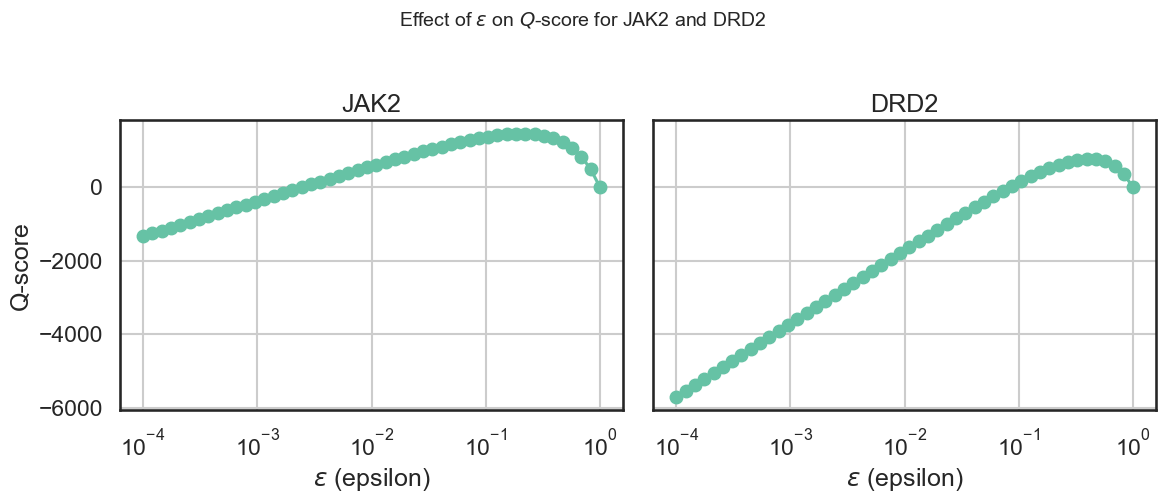

In [17]:
proteins = ["JAK2", "DRD2"]
# sample epsilons from 1e-4 up to 1.0 (50 points)
epsilons = np.logspace(-4, 0, 50)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for ax, protein in zip(axes, proteins):
    Qs = evaluate_epsilon(protein, epsilons)
    ax.plot(epsilons, Qs, marker='o', linestyle='-')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$ (epsilon)")
    ax.set_title(f"{protein}")
    ax.grid(True)

axes[0].set_ylabel("Q-score")
fig.suptitle(r"Effect of $\epsilon$ on $Q$-score for JAK2 and DRD2", y=1.02, fontsize=14)
plt.tight_layout()
#plt.savefig("epsilon_vs_Q.png", dpi=300)
plt.show()

[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.001).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.01).
[search.py] Noisy Q calculation (epsilon = 0.1).
[search.py] Noisy Q calculation (epsilon =

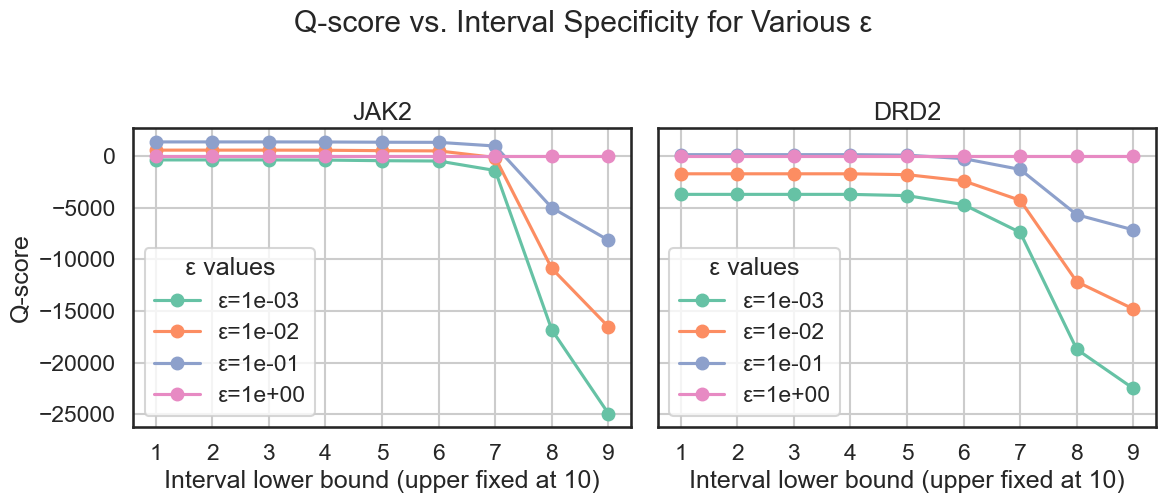

In [18]:
def evaluate_intervals(protein, lowers, upper, epsilon):
    # load labelled data for this protein
    labelled_file, _ = construct_file_paths("data", protein)
    D = pd.read_csv(labelled_file).to_dict(orient="records")

    # single factor on CNNaffinity
    factor = lambda x: x['CNNaffinity']
    Qs = []
    for lb in lowers:
        h = Hypothesis([factor], [[lb, upper]])
        Qs.append(compute_Q(h, "Background Knowledge", D, epsilon=epsilon))
    return Qs

proteins = ["JAK2", "DRD2"]
lowers   = list(range(1, 10))             # interval lower bounds 1…9
upper    = 10
epsilons = np.logspace(-3, 0, 4)          # e.g. [1e-3, 1e-2, 1e-1, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for ax, protein in zip(axes, proteins):
    for eps in epsilons:
        Qs = evaluate_intervals(protein, lowers, upper, epsilon=eps)
        ax.plot(lowers, Qs, marker='o', linestyle='-',
                label=f"ε={eps:.0e}")
    ax.set_xticks(lowers)
    ax.set_xlabel("Interval lower bound (upper fixed at 10)")
    ax.set_title(protein)
    ax.grid(True)
    ax.legend(title="ε values")

axes[0].set_ylabel("Q-score")
fig.suptitle("Q-score vs. Interval Specificity for Various ε", y=1.02)
plt.tight_layout()
#plt.savefig("interval_vs_Q_eps.png", dpi=300)
plt.show()

#### Statistics of molecules generated for each target

In [1]:
from mol_utils import show_results

display(show_results(result_dir="./results/GenMolMF/DRD2/gpt-4o/230625_1922_eps0/"))
display(show_results(result_dir="./results/GenMolMF/DRD2/gpt-4o/230625_2029/"))
display(show_results(result_dir="./results/GenMolMF/DRD2/gpt-4o/230625_1816_eps0.5/"))

display(show_results(result_dir="./results/GenMolMF/JAK2/gpt-4o/230625_1422_eps0/"))
display(show_results(result_dir="./results/GenMolMF/JAK2/gpt-4o/090225_2048/"))
display(show_results(result_dir="./results/GenMolMF/JAK2/gpt-4o/230625_1627_eps0.5/"))


./results/GenMolMF/DRD2/gpt-4o/230625_1922_eps0/


,mean,median,std,min,max
CNNaffinity,7.501768,7.502000,0.564898,5.766000,8.646000
Tanimoto,0.138277,0.145031,0.027443,0.082588,0.184563



./results/GenMolMF/DRD2/gpt-4o/230625_2029/


,mean,median,std,min,max
CNNaffinity,7.548667,7.554000,0.565168,5.921000,8.508000
Tanimoto,0.136908,0.146758,0.031447,0.080092,0.188844



./results/GenMolMF/DRD2/gpt-4o/230625_1816_eps0.5/


,mean,median,std,min,max
CNNaffinity,7.501667,7.486000,0.680293,5.92300,8.697000
Tanimoto,0.130601,0.134854,0.030599,0.07946,0.193123



./results/GenMolMF/JAK2/gpt-4o/230625_1422_eps0/


,mean,median,std,min,max
CNNaffinity,7.584746,7.541000,0.782852,4.82400,8.813000
Tanimoto,0.138177,0.141171,0.013886,0.10702,0.164171



./results/GenMolMF/JAK2/gpt-4o/090225_2048/


,mean,median,std,min,max
CNNaffinity,7.446887,7.455000,0.733741,5.094000,8.762000
Tanimoto,0.141991,0.144384,0.014944,0.116161,0.166086



./results/GenMolMF/JAK2/gpt-4o/230625_1627_eps0.5/


,mean,median,std,min,max
CNNaffinity,7.530846,7.386500,0.694305,4.868000,9.047000
Tanimoto,0.135489,0.138854,0.015274,0.102401,0.163176


In [2]:
import pandas as pd
df = pd.read_csv("./results/GenMolMF/DRD2/gpt-4o/230625_1922_eps0/all.csv")
df.columns

Index(['SMILES', 'MolWt', 'LogP', 'QED', 'SAS', 'TPSA', 'H_Acceptors',
       'H_Donors', 'Rotatable_Bonds', 'Affinity', 'CNNaffinity', 'Label'],
      dtype='object')

In [36]:
import os
import pandas as pd
import itertools
from statsmodels.stats.weightstats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_violins_publication(result_dirs, title=None, figsize=(7, 5), dpi=300):
    """
    Publication-ready violin plot with clean black and white aesthetic
    
    result_dirs: dict mapping label → path to all.csv
    title: optional title for the plot
    figsize: figure size tuple
    dpi: resolution for high-quality output
    """
    labels = list(result_dirs.keys())
    pairs = list(itertools.combinations(labels, 2))
    
    # Load & combine data
    df_list = []
    for label, path in result_dirs.items():
        df = pd.read_csv(path)
        df_list.append(df.assign(group=label))
    combined = pd.concat(df_list, ignore_index=True)
    
    # Set publication-ready style with fallback fonts
    plt.rcParams.update({
        'font.family': 'sans-serif',  # More universally available
        'font.sans-serif': ['Arial', 'Liberation Sans', 'DejaVu Sans', 'sans-serif'],
        'font.size': 16,
        'axes.linewidth': 1.2,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16,
        'figure.dpi': dpi,
        'savefig.dpi': dpi,
        'text.usetex': False,  # Set to True if you have LaTeX installed
        'axes.spines.top': False,
        'axes.spines.right': False
    })
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Define grayscale colors and patterns
    n_groups = len(labels)
    grays = plt.cm.gray_r(np.linspace(0.3, 0.8, n_groups))
    
    # Plot violins with different gray shades
    parts = ax.violinplot(
        [combined[combined.group == label]["CNNaffinity"].values for label in labels],
        positions=range(len(labels)),
        showmeans=False,
        showmedians=True,
        showextrema=False
    )
    
    # Style violin parts
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(grays[i])
        pc.set_edgecolor('black')
        pc.set_linewidth(1.2)
        pc.set_alpha(0.8)
    
    # Style median lines
    parts['cmedians'].set_colors('black')
    parts['cmedians'].set_linewidth(2)
    
    
    # Add individual points with jitter
    for i, label in enumerate(labels):
        y_data = combined[combined.group == label]["CNNaffinity"].values
        x_data = np.random.normal(i, 0.05, size=len(y_data))  # Add jitter
        ax.scatter(x_data, y_data, alpha=0.6, s=20, color='black', 
                  marker='o', edgecolor='white', linewidth=0.5, zorder=3)
    
    # Compute ranges for significance annotations
    y_max = 10 #combined["CNNaffinity"].max()
    y_min = 4.72 #combined["CNNaffinity"].min()
    print(y_max)
    print(y_min)
    y_range = y_max - y_min
    line_offset = 0.08 * y_range
    text_offset = 0.02 * y_range
    max_annot_y = y_max
    
    # Annotate significant p-values
    significant_pairs = []
    for idx, (g1, g2) in enumerate(pairs):
        s1 = combined.loc[combined.group == g1, "CNNaffinity"]
        s2 = combined.loc[combined.group == g2, "CNNaffinity"]
        tstat, pval, dfree = ttest_ind(s1, s2, usevar="unequal")
        
        if pval < 0.05:
            significant_pairs.append((g1, g2, pval))
            x1, x2 = labels.index(g1), labels.index(g2)
            y = y_max + (len(significant_pairs)) * line_offset
            
            # Draw significance bracket
            ax.plot([x1, x1, x2, x2],
                   [y, y + text_offset, y + text_offset, y],
                   lw=1.5, c='black')
            
            # Format p-value with decimal places
            if pval < 0.001:
                p_text = f"p < 0.001"
            else:
                p_text = f"p = {pval:.4f}"
                
            ax.text((x1 + x2) / 2, y + text_offset,
                   p_text, ha='center', va='bottom', 
                   fontsize=14, fontweight='normal')
            
            max_annot_y = max(max_annot_y, y + text_offset)
    
    # Add mean ± std annotations below violins
    stats_df = combined.groupby("group")["CNNaffinity"].agg(["mean", "std"])
    for i, grp in enumerate(labels):
        mean_val, std_val = stats_df.loc[grp, "mean"], stats_df.loc[grp, "std"]
        ax.text(i, y_min - 0.08 * y_range,
               f"{mean_val:.2f} ± {std_val:.2f}",
               ha='center', va='top', fontsize=16,
               color='black', style='italic')
    
    # Customize axes
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=16)
    ax.set_ylabel("CNNaffinity", fontsize=16) #, fontweight='bold')
    ax.set_xlabel("")
    
    # Set limits with padding
    ax.set_ylim(bottom=y_min - 0.15 * y_range,
               top=max_annot_y + 0.05 * y_range if significant_pairs else y_max + 0.1 * y_range)
    
    # Grid and spines
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    
    # Title
    if title:
        ax.set_title(title, fontsize=16, pad=10)#, fontweight='bold'
    
    # Add sample sizes
    for i, label in enumerate(labels):
        n = len(combined[combined.group == label])
        ax.text(i, y_max + 0.02 * y_range, f'n={n}',
               ha='center', va='bottom', fontsize=10,
               color='gray', style='italic')
    
    plt.tight_layout()
    return fig, ax

# Enhanced usage function
def save_figure(result_dirs, filename="violin_plot", title=None, 
                          formats=['svg','png'], dpi=300):
    """
    Save the plot in multiple high-quality formats suitable for publication
    """
    fig, ax = plot_violins_publication(result_dirs, title=title, dpi=dpi)
    
    for fmt in formats:
        fig.savefig(f"{filename}.{fmt}", 
                   format=fmt, 
                   dpi=dpi, 
                   bbox_inches='tight',
                   facecolor='white',
                   edgecolor='none')
        print(f"Saved: {filename}.{fmt}")
    
    plt.show()
    return fig, ax

8.949
4.566
Saved: plots/gpt-4o_temp_effects.svg


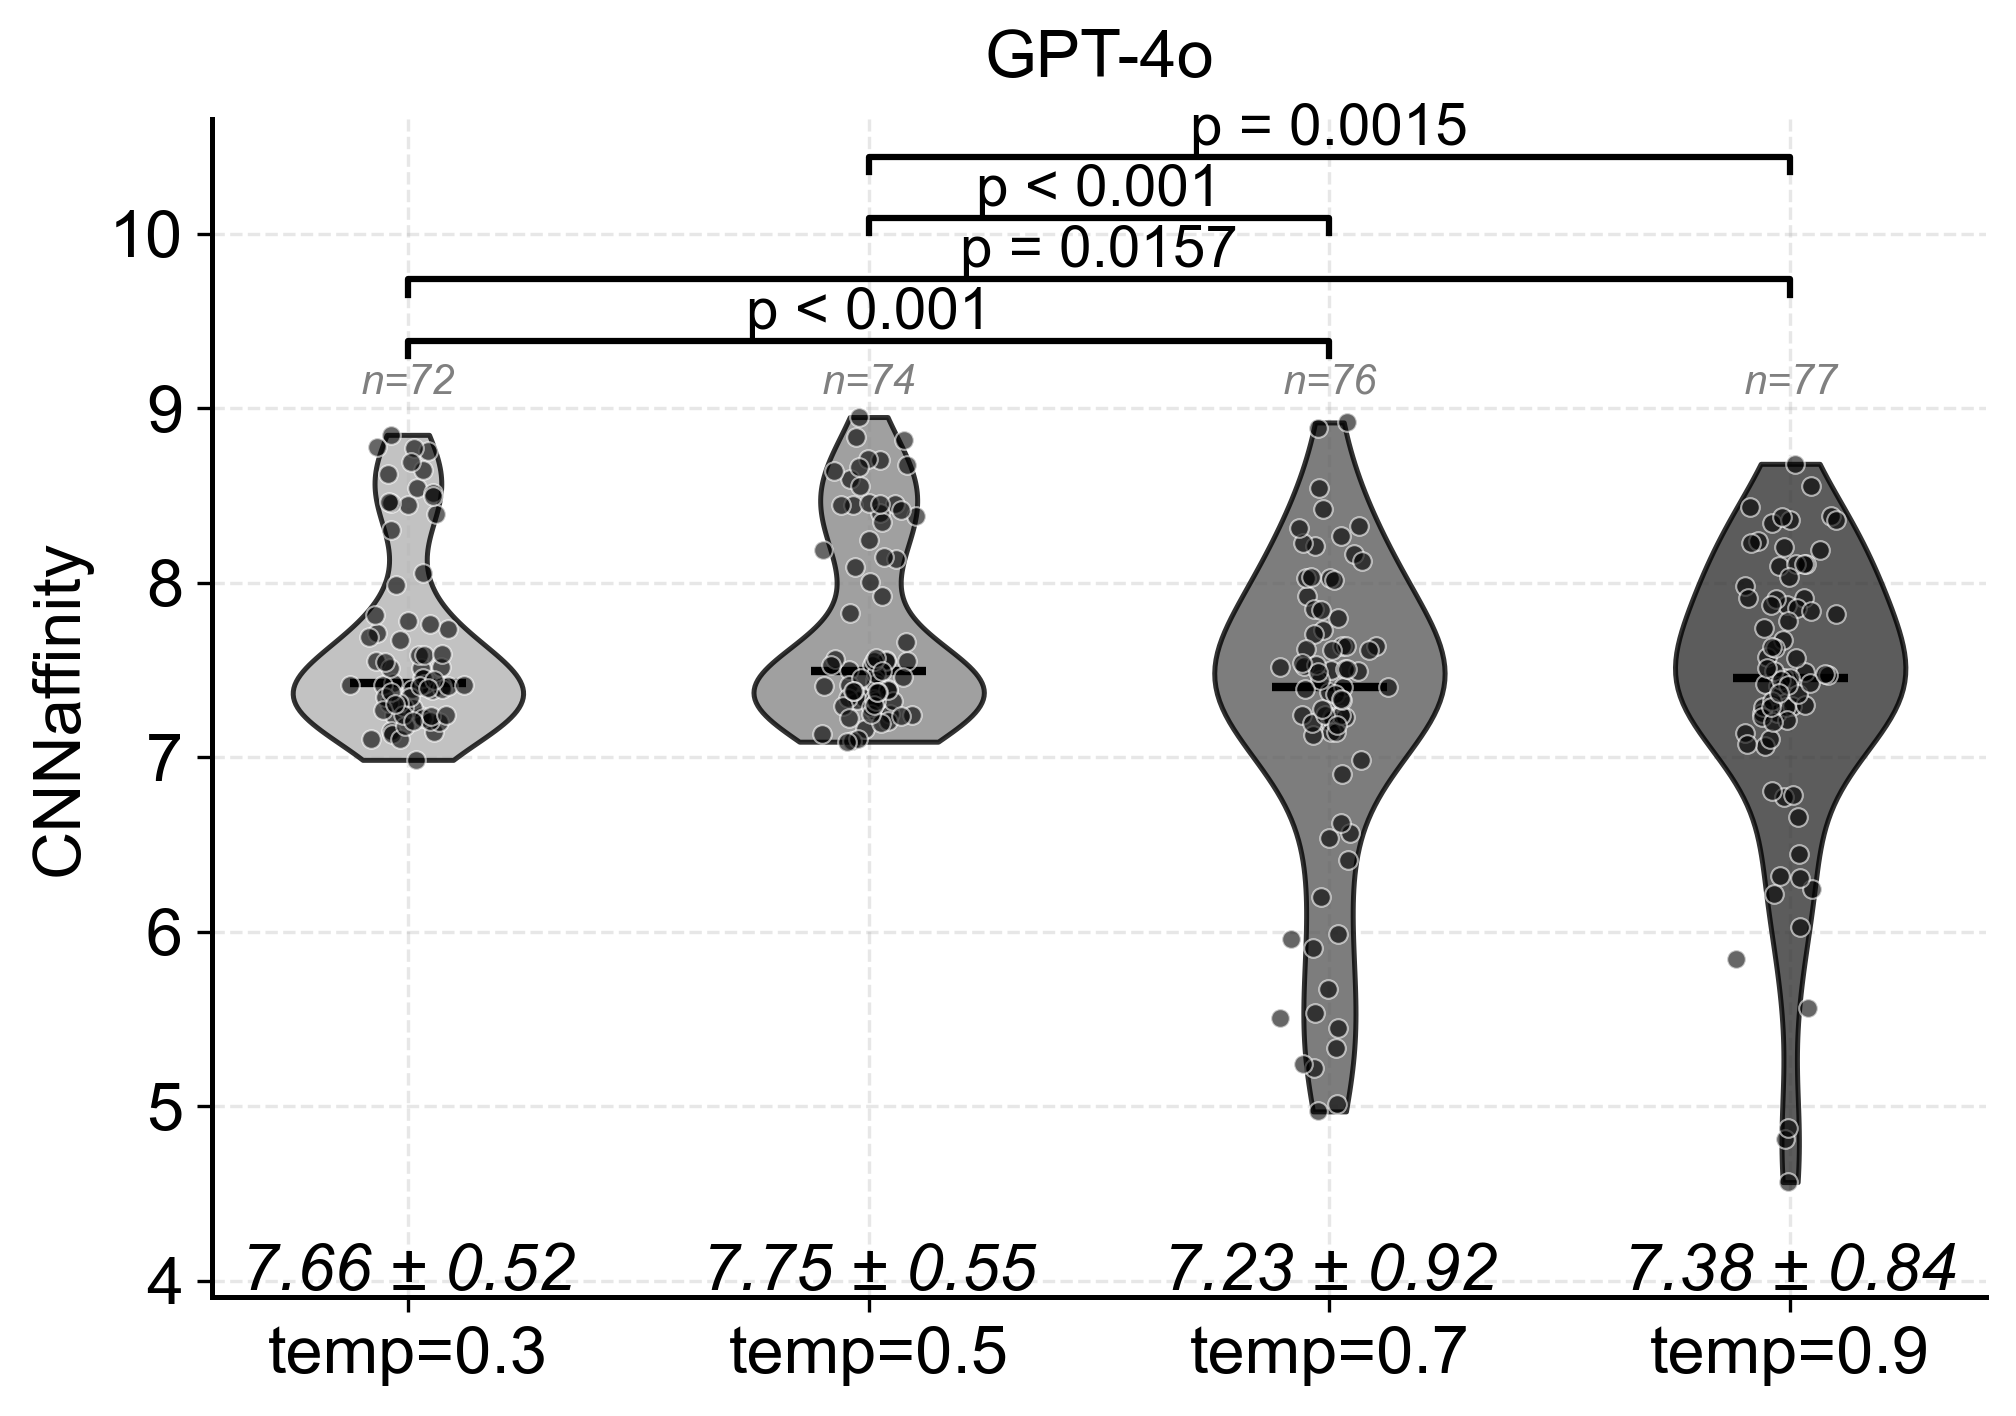

8.747
6.895
Saved: plots/claude-3.5-sonnet_temp_effects.svg


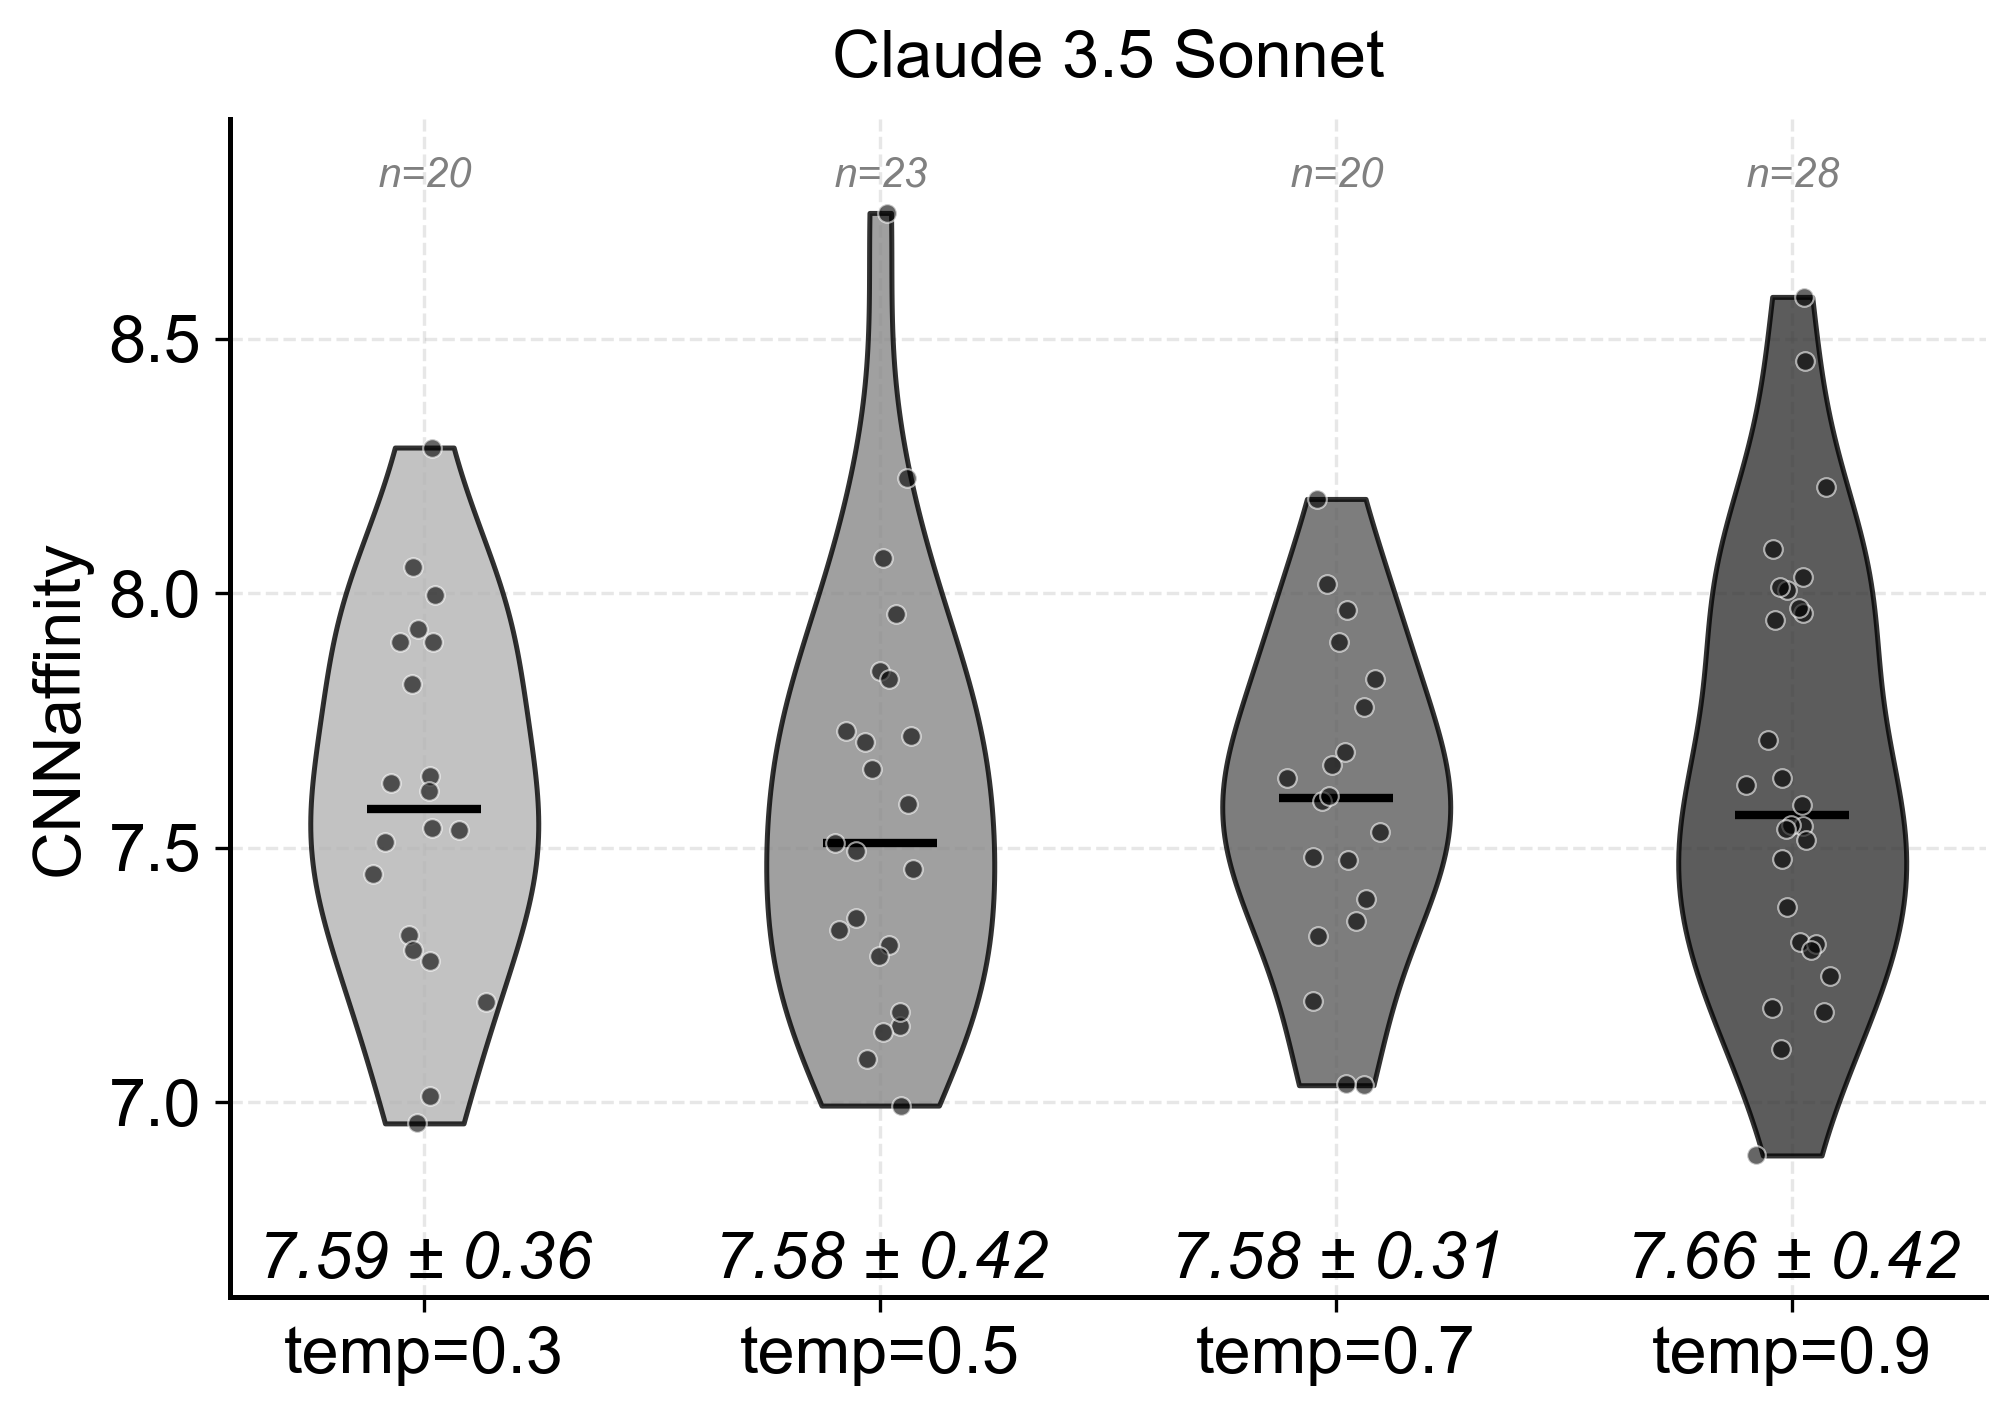

In [7]:
#     result_dirs = {
#     "eps=0": "./results/GenMolMF/JAK2/gpt-4o/230625_1422_eps0/all.csv",
#     "eps=0.1": "./results/GenMolMF/JAK2/gpt-4o/090225_2022/all.csv",
#     "eps=0.5": "./results/GenMolMF/JAK2/gpt-4o/230625_1627_eps0.5/all.csv"
#     }
#     plot_violins_publication(result_dirs, title="JAK2_eps")

#     result_dirs = {
#         "eps=0": "./results/GenMolMF/DRD2/gpt-4o/230625_1922_eps0/all.csv",
#         "eps=0.1": "./results/GenMolMF/DRD2/gpt-4o/230625_2029/all.csv",
#         "eps=0.5": "./results/GenMolMF/DRD2/gpt-4o/230625_1816_eps0.5/all.csv"
#     }
#     plot_violins_publication(result_dirs, title="DRD2_eps")

result_dirs = {
    "temp=0.3": "./results/GenMolMF/JAK2/gpt-4o/250625_0518_temp0.3/all.csv",
    "temp=0.5": "./results/GenMolMF/JAK2/gpt-4o/240625_1935_temp0.5/all.csv", 
    "temp=0.7": "./results/GenMolMF/JAK2/gpt-4o/090225_2022/all.csv",
    "temp=0.9": "./results/GenMolMF/JAK2/gpt-4o/250625_0833_temp0.9/all.csv"
}
save_figure(result_dirs, filename="plots/gpt-4o_temp_effects", title="GPT-4o")

result_dirs = {
    "temp=0.3": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/090825_1916_temp0.3/all.csv",
    "temp=0.5": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/090825_2023_temp0.5/all.csv",
    "temp=0.7": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/100825_0050/all.csv",
    "temp=0.9": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/040825_1926_temp0.9/all.csv"
}
save_figure(result_dirs, filename="plots/claude-3.5-sonnet_temp_effects", title="Claude 3.5 Sonnet")

10
4.72
Saved: plots/claude-3.5-sonnet_temp_effects.svg


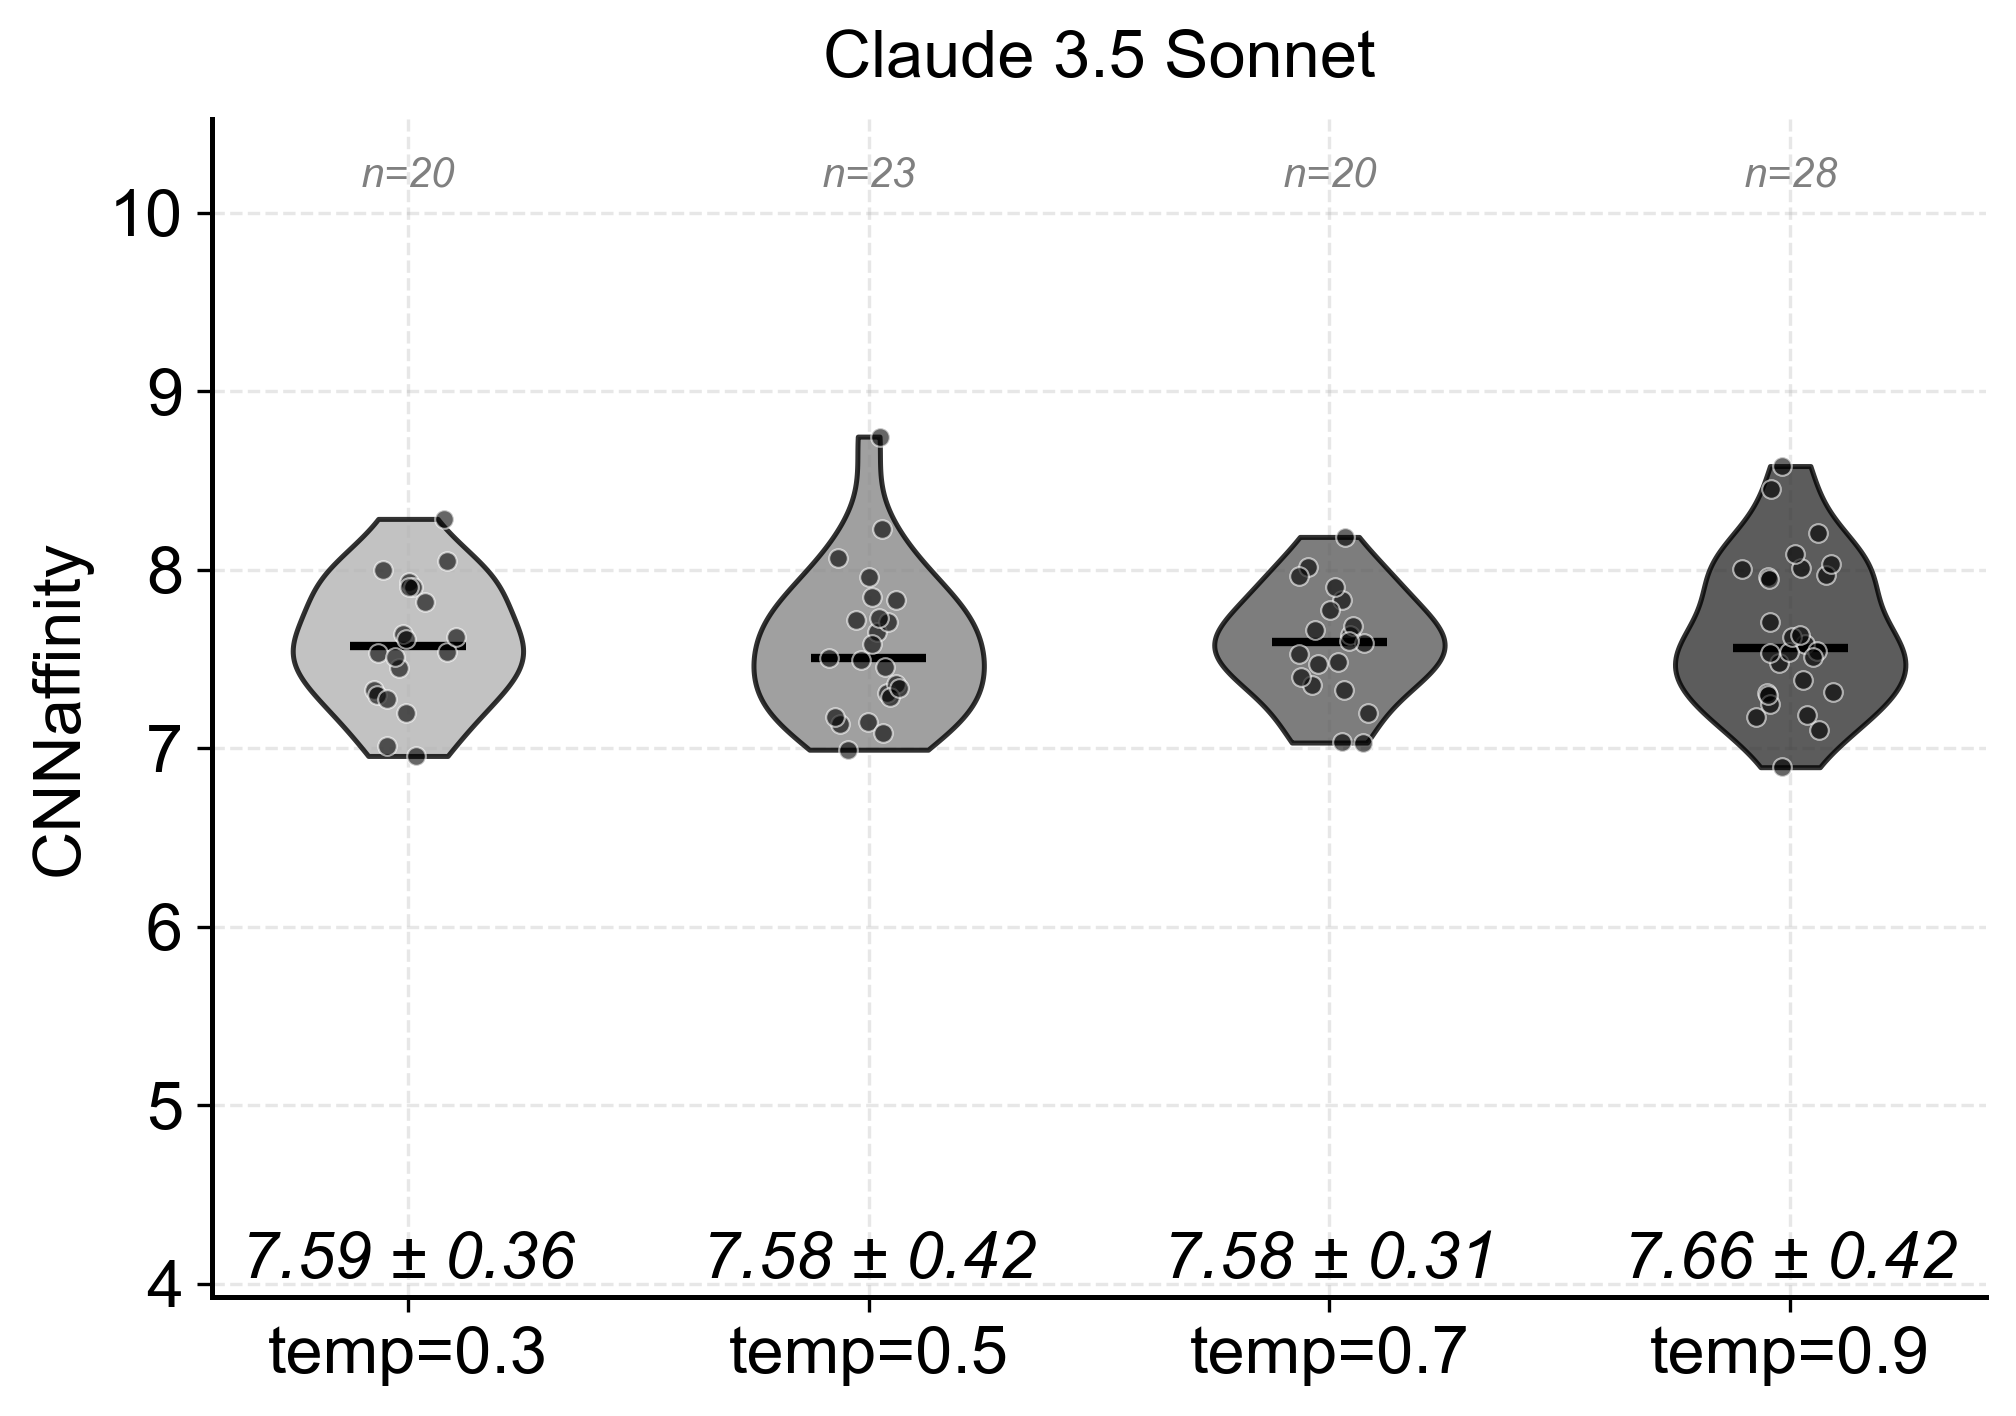

(<Figure size 2100x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'Claude 3.5 Sonnet'}, ylabel='CNNaffinity'>)

In [23]:
result_dirs = {
        "temp=0.3": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/090825_1916_temp0.3/all.csv",
        "temp=0.5": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/090825_2023_temp0.5/all.csv",
        "temp=0.7": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/100825_0050/all.csv",
        "temp=0.9": "./results_claude/GenMolMF/JAK2/claude-3-5-sonnet-20241022/040825_1926_temp0.9/all.csv"
    }
save_figure(result_dirs, filename="plots/claude-3.5-sonnet_temp_effects", title="Claude 3.5 Sonnet")

10
4.72
Saved: plots/molecule-gpt2_temp_effects.svg


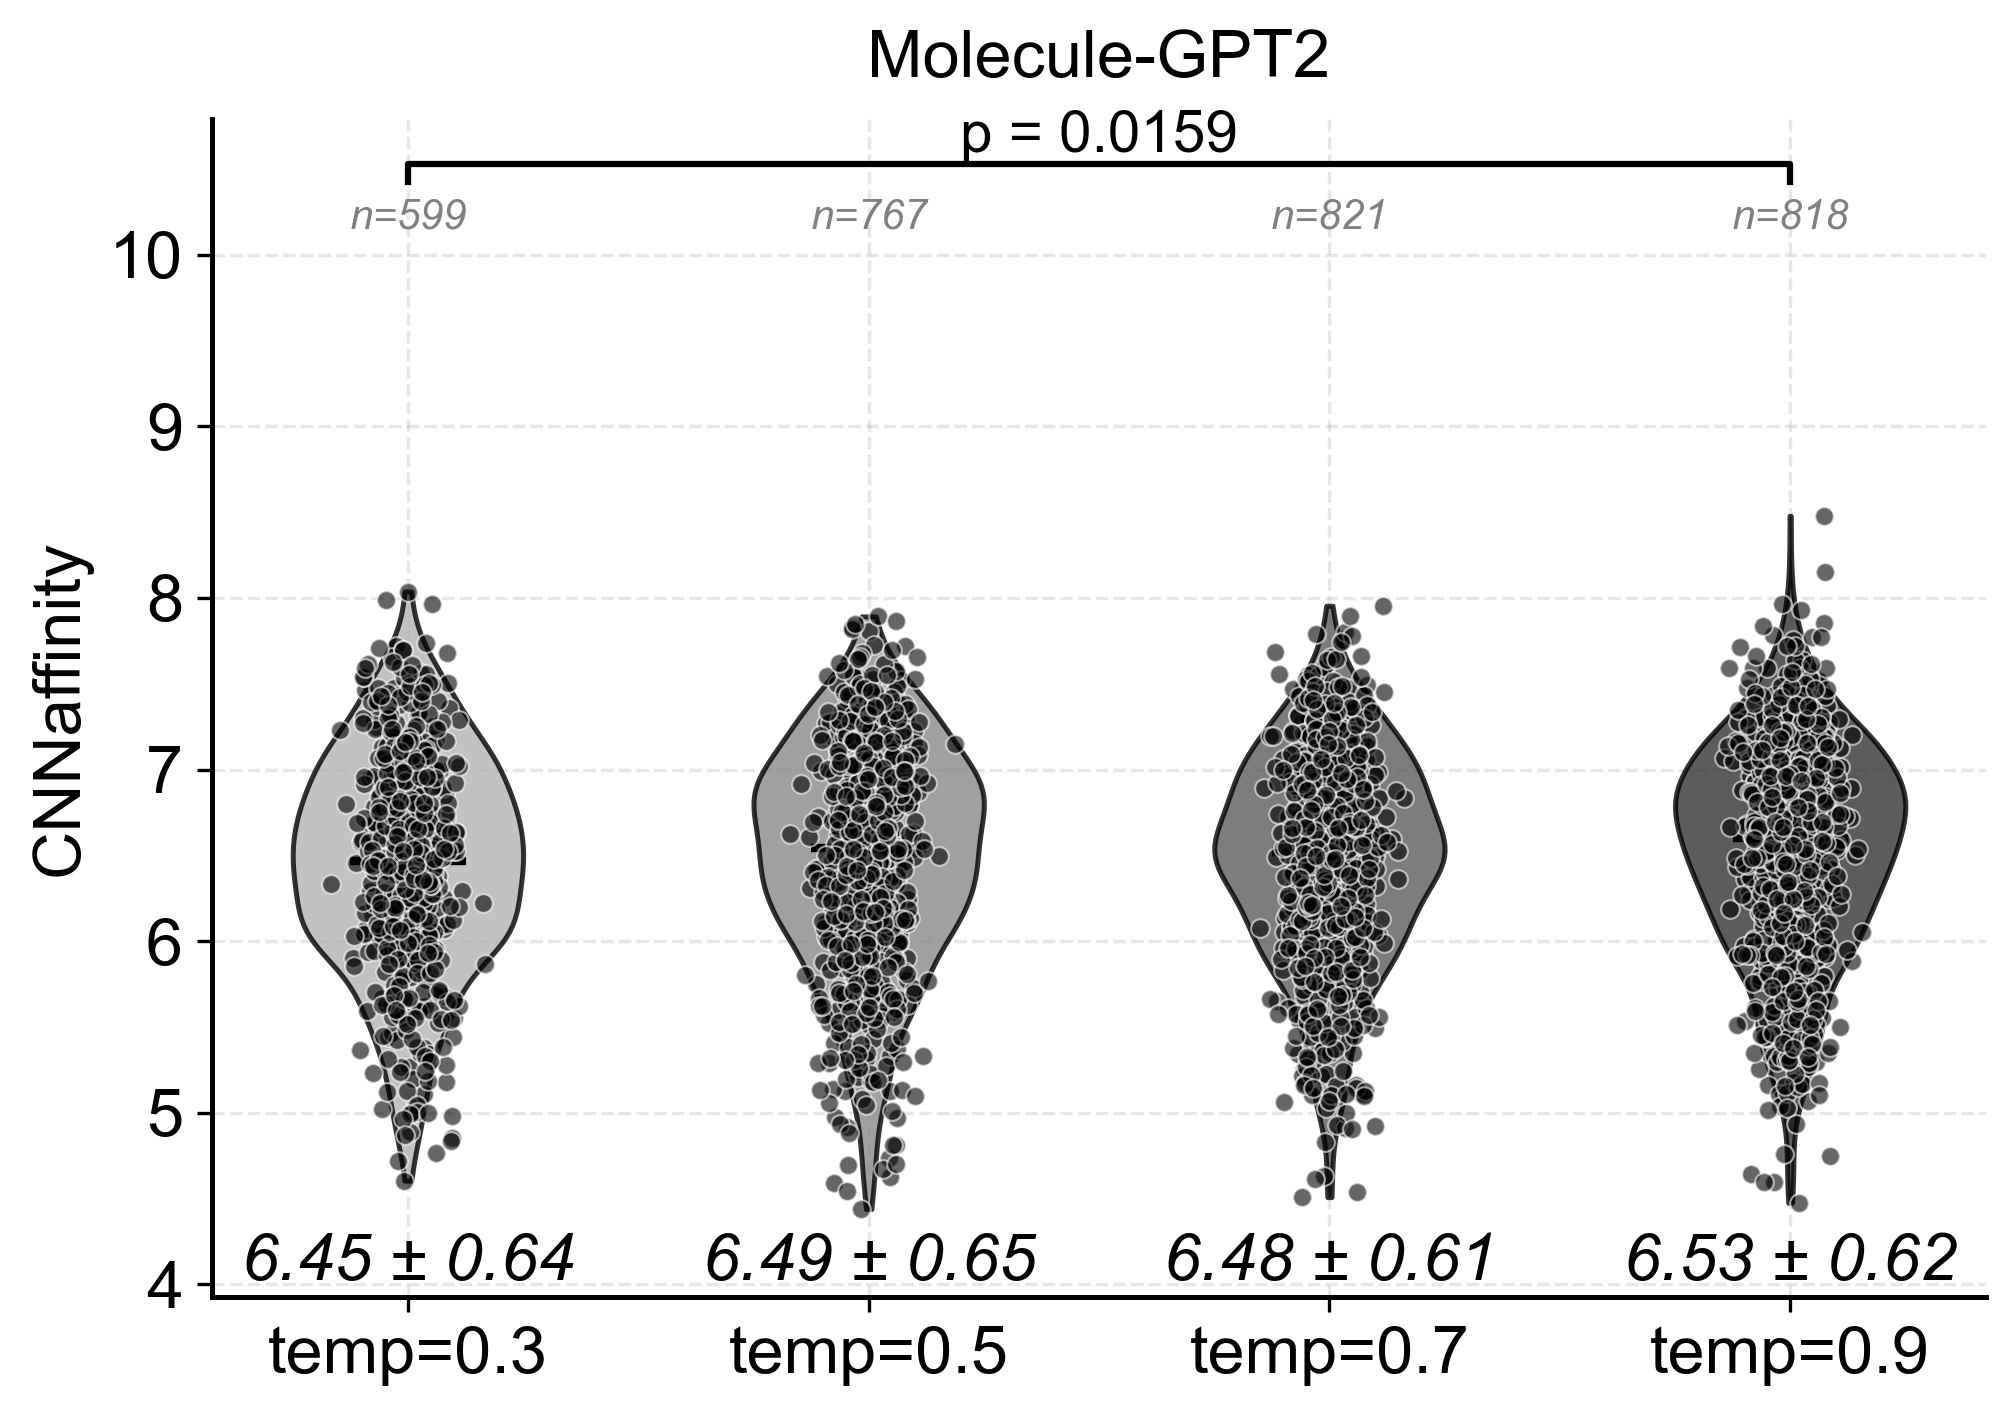

(<Figure size 2100x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'Molecule-GPT2'}, ylabel='CNNaffinity'>)

In [27]:
result_dirs = {
    "temp=0.3": "results_ZincGPT2/GenMolMF/JAK2/gpt2_zinc_87m/120825_1315_temp0.3/all.csv",
    "temp=0.5": "results_ZincGPT2/GenMolMF/JAK2/gpt2_zinc_87m/120825_1802_temp0.5/all.csv",
    "temp=0.7": "results_ZincGPT2/GenMolMF/JAK2/gpt2_zinc_87m/120825_2306_temp0.7/all.csv",
    "temp=0.9": "results_ZincGPT2/GenMolMF/JAK2/gpt2_zinc_87m/130825_0449_temp0.9/all.csv"
}

save_figure(result_dirs, filename="plots/molecule-gpt2_temp_effects", title="Molecule-GPT2")

10
4.72
Saved: plots/gpt-4o_JAK2_sampling.svg
Saved: plots/gpt-4o_JAK2_sampling.png


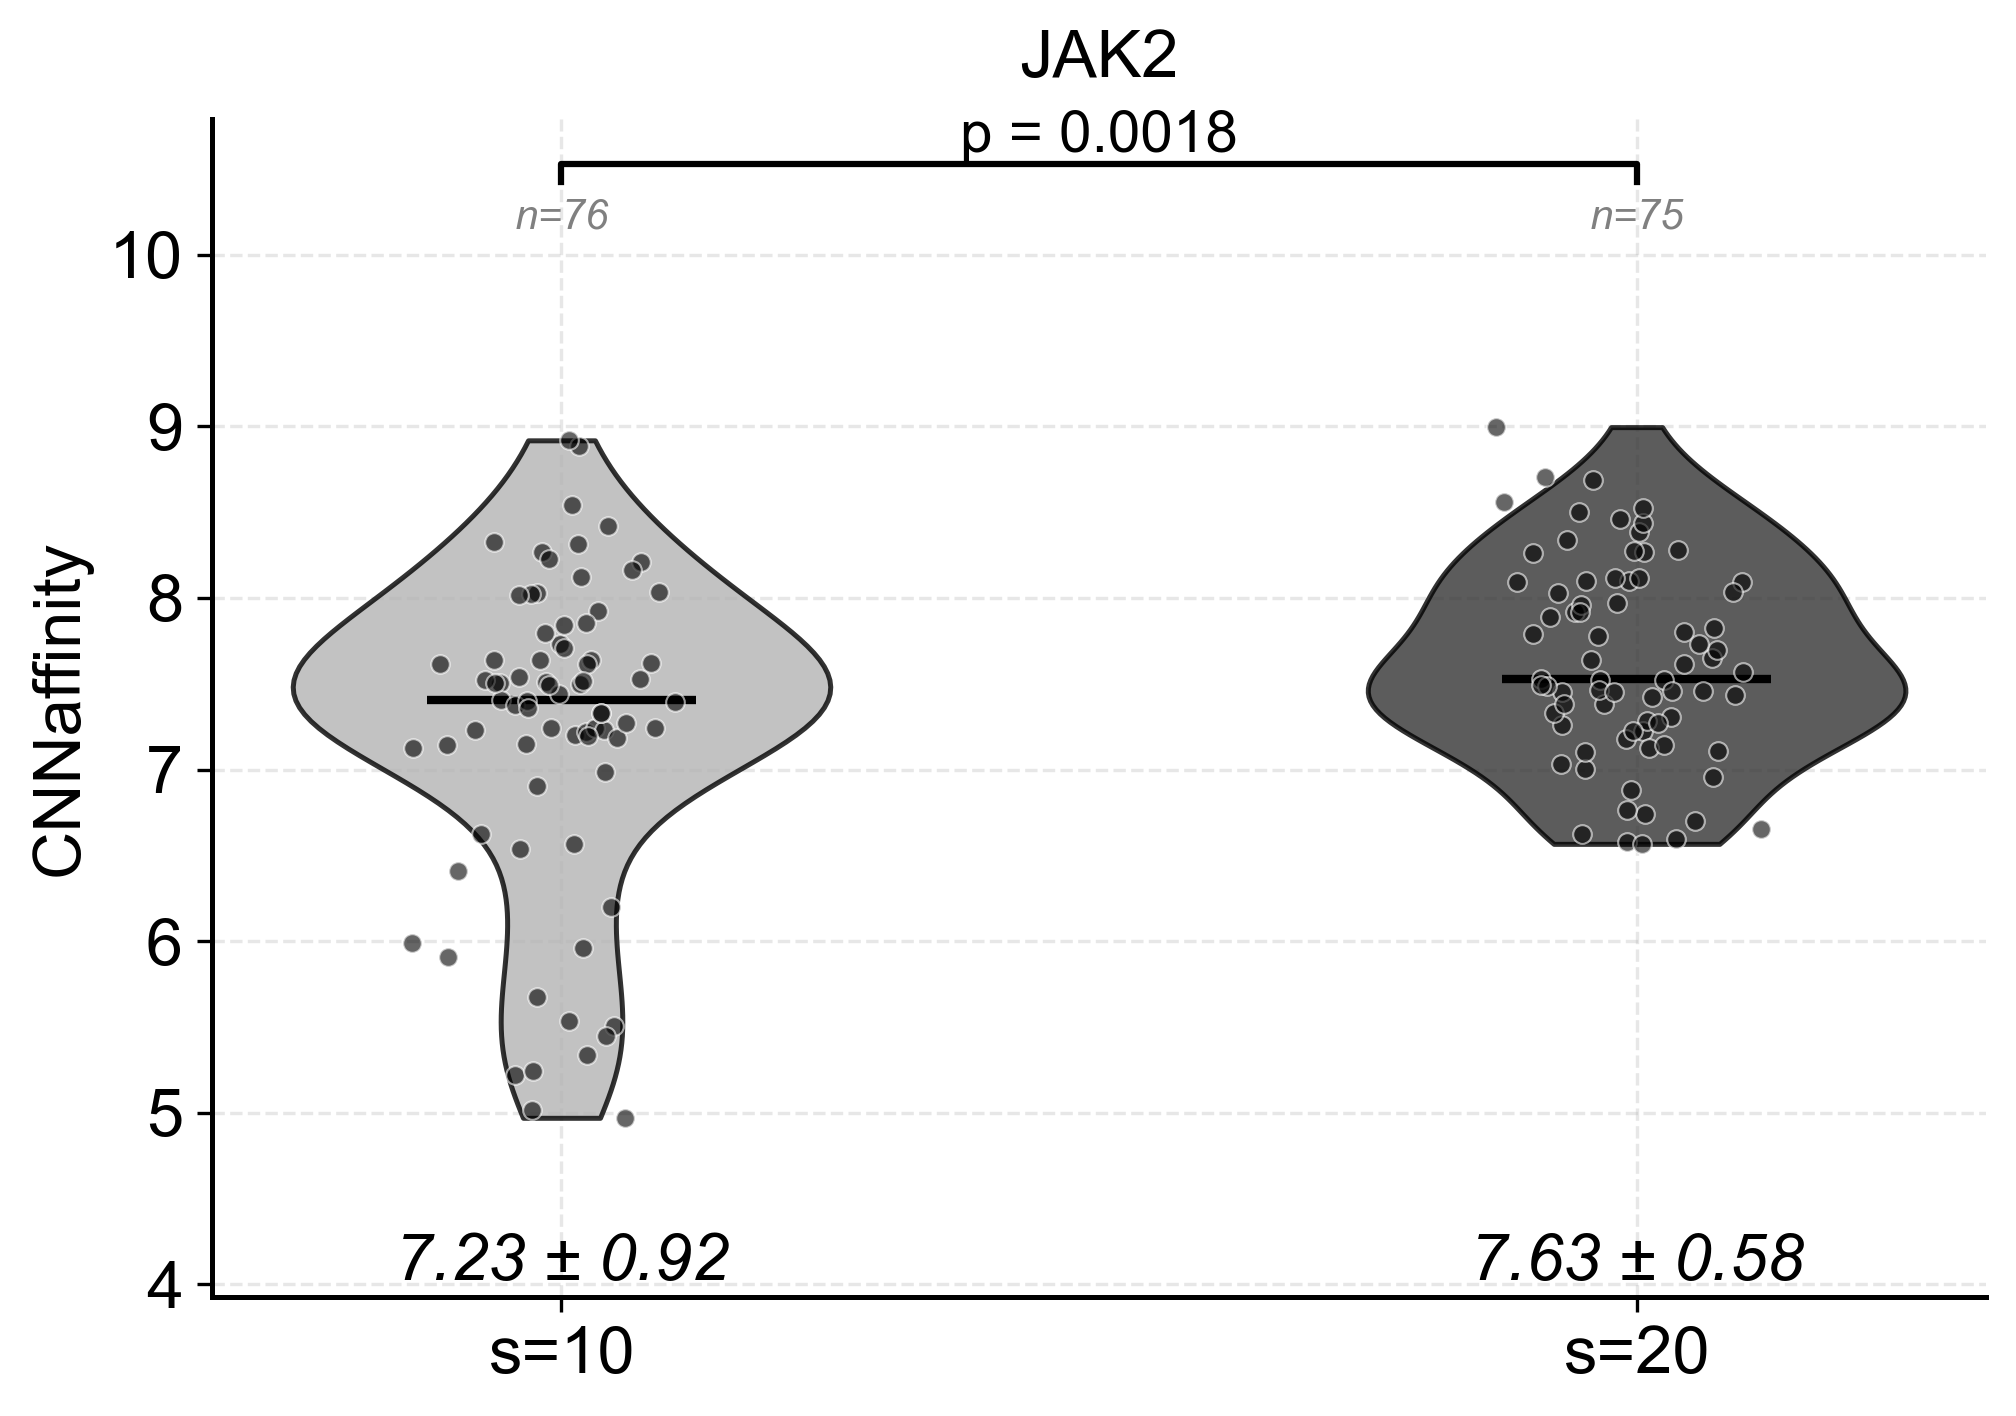

(<Figure size 2100x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'JAK2'}, ylabel='CNNaffinity'>)

In [37]:
result_dirs = {
    "s=10": "./results/GenMolMF/JAK2/gpt-4o/090225_2022/all.csv",
    "s=20": "./results/GenMolMF/JAK2/gpt-4o/130825_1054_s20/all.csv",
}

save_figure(result_dirs, filename="plots/gpt-4o_JAK2_sampling", title="JAK2")

10
3
Saved: plots/gpt-4o_DBH_sampling.svg
Saved: plots/gpt-4o_DBH_sampling.png


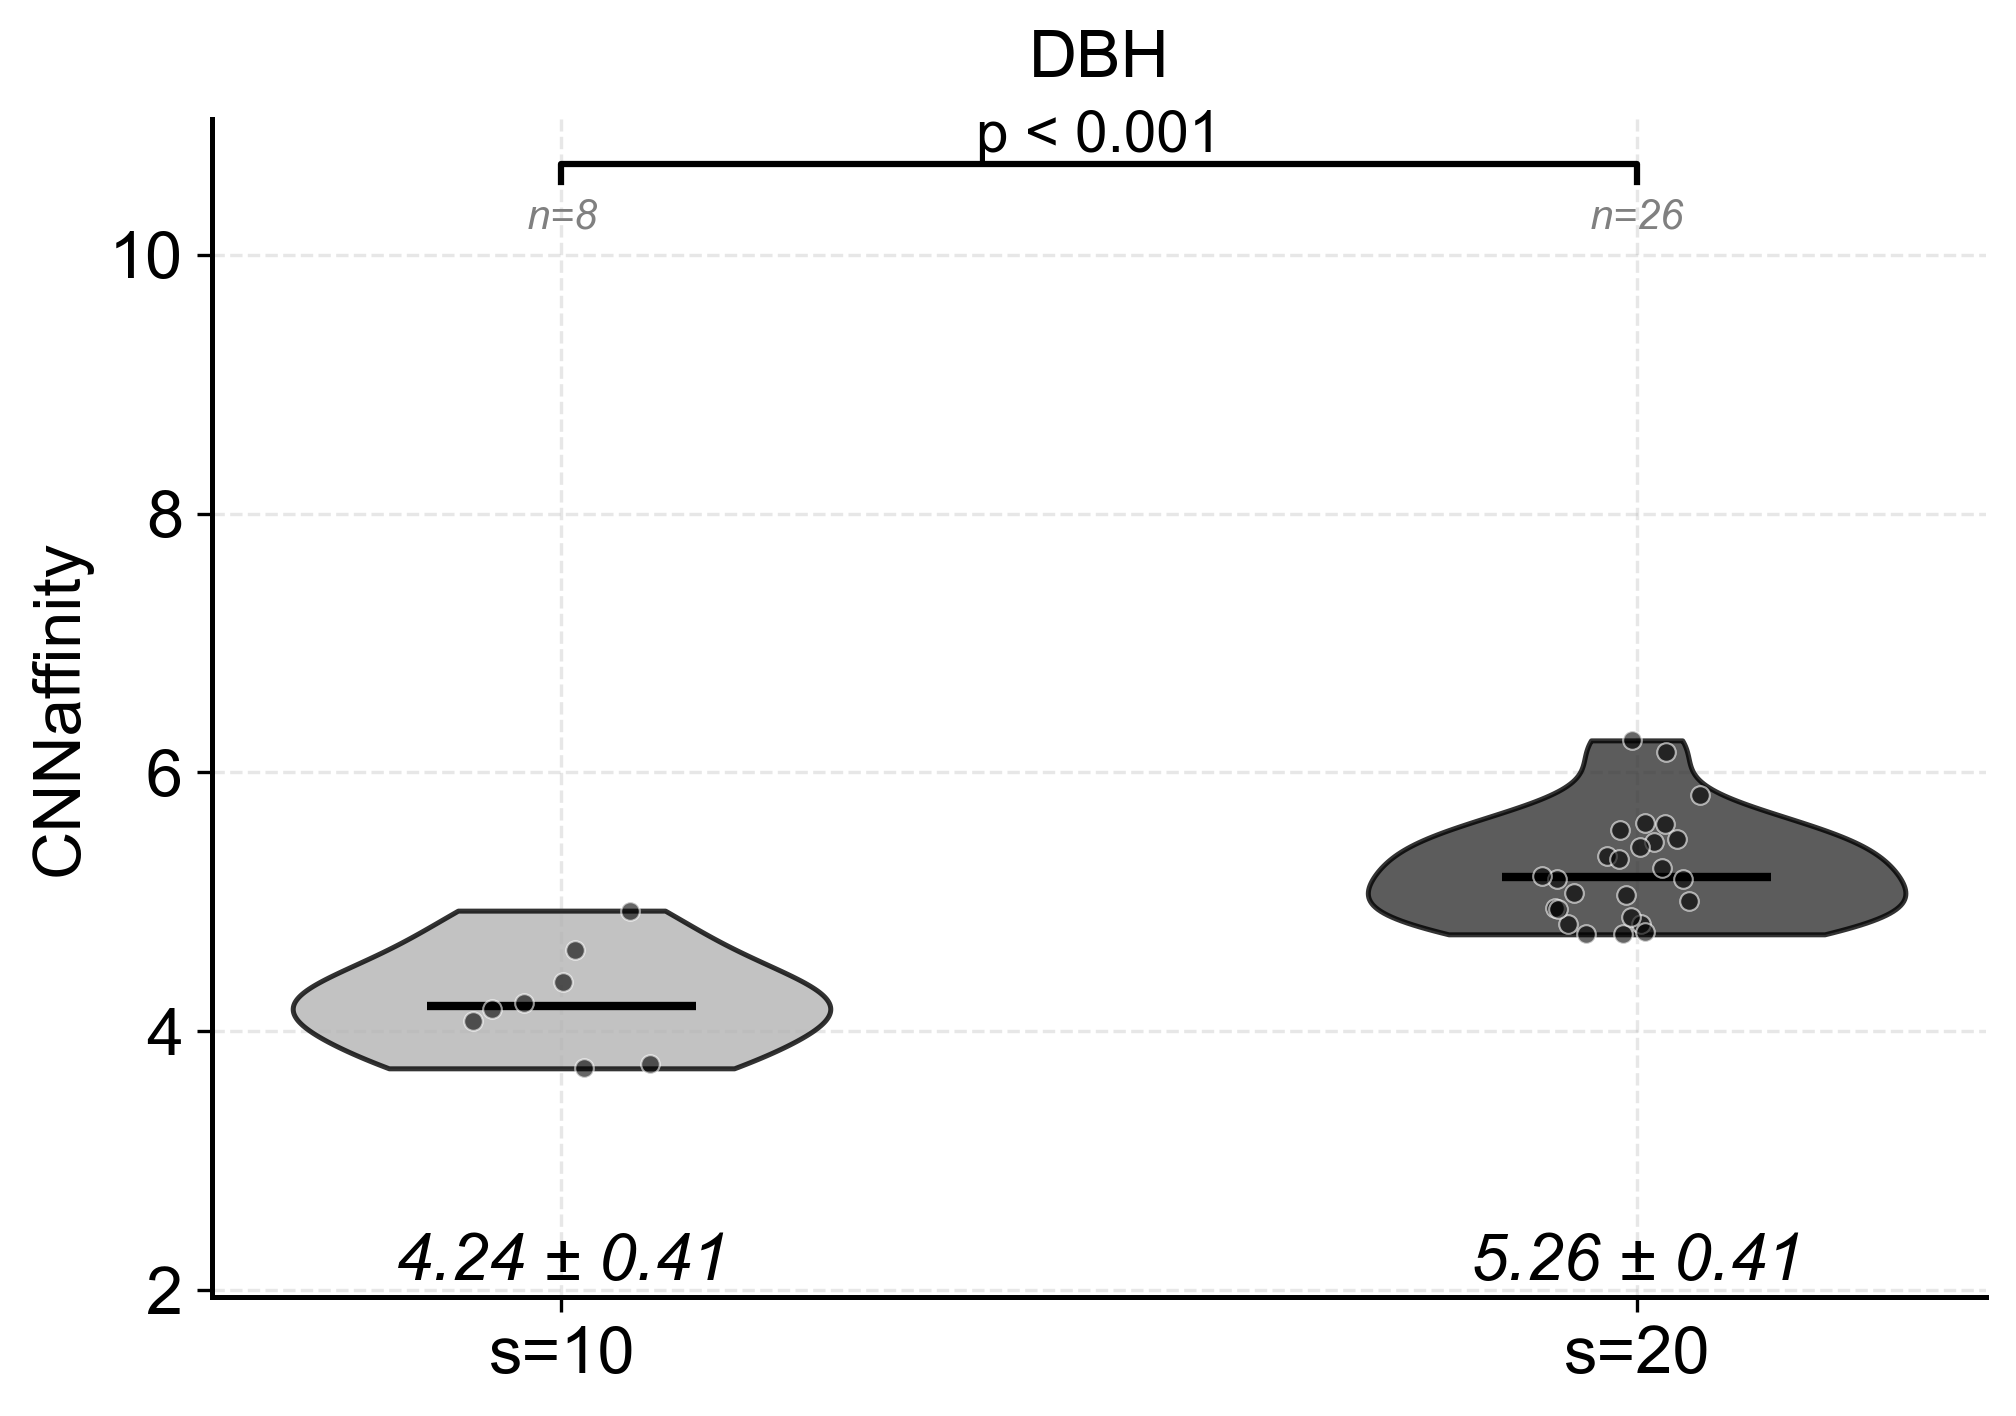

(<Figure size 2100x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'DBH'}, ylabel='CNNaffinity'>)

In [34]:
result_dirs = {
    "s=10": "./results/GenMolMF/DBH/gpt-4o/090225_2249/all.csv",
    "s=20": "./results/GenMolMF/DBH/gpt-4o/140825_1237/all.csv"
}

save_figure(result_dirs, filename="plots/gpt-4o_DBH_sampling", title="DBH")